<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/final_practice_CNN_vs_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using the handwritten digits lets compare CNN and ANN

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


#I need to explore my dataset

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_test.shape

(10000, 28, 28)

#Lets Visualize to see what we have got

In [37]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [38]:
classes = []

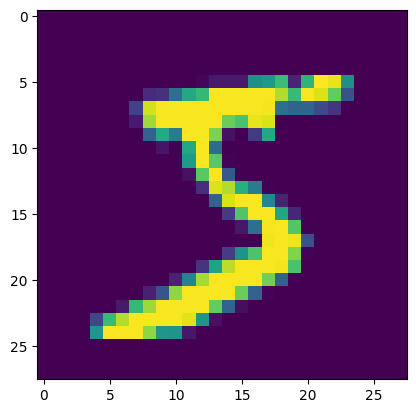

In [39]:
plt.imshow(x_train[0])

In [40]:
y_test[0]

7

In [41]:
def sample_show(x, y, index):
  plt.figure(figsize=(10,1))
  plt.imshow(x[index])
  plt.xlabel(y[index])

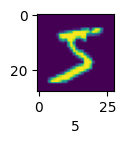

In [42]:
sample_show(x_train, y_train, 0)

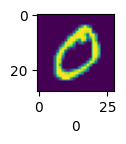

In [43]:
sample_show(x_train, y_train, 1)

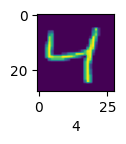

In [44]:
sample_show(x_train, y_train, 2)

In [45]:
x_train = x_train/255
x_test = x_test/255

In [46]:
#convert y_test and y_train to categorical variable

y_train_categorical  = keras.utils.to_categorical(y_train , num_classes = 10)
y_test_categorical  = keras.utils.to_categorical(y_test , num_classes = 10)

#Lets build the ANN model

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
x_train[0].shape

(28, 28)

In [49]:
x_test.shape

(10000, 28, 28)

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'sigmoid')
])


model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train, y_train_categorical, epochs = 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7506 - loss: 0.7960
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8838 - loss: 0.3881
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8949 - loss: 0.3407
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9031 - loss: 0.3135
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.3021
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9108 - loss: 0.2864
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9135 - loss: 0.2719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9170 - loss: 0.2644
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9154 - loss: 0.2710
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9193 - loss: 0.2475


In [52]:
model.evaluate(x_test, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1613


[0.13536538183689117, 0.9621999859809875]

In [53]:
y_preds = model.predict(x_test)
y_preds[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.45091635e-05, 2.59219036e-07, 8.07798207e-01, 8.96769404e-01,
        1.03203140e-10, 3.66082117e-02, 2.26991142e-14, 9.99999166e-01,
        4.94109117e-05, 2.77230795e-02],
       [5.41938527e-04, 4.52142954e-01, 9.99998569e-01, 9.96177554e-01,
        6.14630638e-11, 1.52548000e-01, 6.10658375e-04, 2.67199881e-04,
        2.67066304e-02, 8.15574483e-11],
       [4.76751411e-05, 9.99212623e-01, 2.42638946e-01, 1.14066832e-01,
        6.55133510e-03, 2.66159959e-02, 1.99558795e-03, 5.12202859e-01,
        3.08526069e-01, 1.69770225e-04],
       [9.99941707e-01, 8.73733279e-06, 2.65652716e-01, 2.41606147e-03,
        5.34031533e-05, 4.88646597e-01, 2.32701376e-01, 1.52576491e-01,
        1.42451376e-03, 1.33353136e-02],
       [1.19442875e-02, 4.30526882e-07, 3.84175599e-01, 2.38151429e-03,
        9.99225020e-01, 1.51401600e-02, 1.13698207e-02, 6.27443016e-01,
        7.52801017e-04, 9.66293335e-01]], dtype=float32)

In [55]:
y_preds = [np.argmax(element) for element in y_preds]
y_preds[:5]

[7, 2, 1, 0, 4]

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.96      0.95       892
           6       0.97      0.97      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.96      0.93      0.94       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



#Using CNN

In [ ]:
#which ofc, we would have seen that it is not neccessaey at all but for the sake of this exercise , lets try it out

In [65]:
CNN  = models.Sequential([
    layers.Conv2D(filters= 20,kernel_size =(3,3 ), activation = 'relu', input_shape= (28, 28, 1)),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),
    layers.Dense(30, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])


CNN.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


CNN.fit(x_train, y_train_categorical, epochs = 10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8779 - loss: 0.4207
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9744 - loss: 0.0856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0587
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0464
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0360
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0186
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9963 - loss: 0.0115


In [66]:
CNN.evaluate(x_test, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0716


[0.06029186397790909, 0.9822999835014343]

In [67]:
y_preds = CNN.predict(x_test)
y_preds[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.0382322e-02, 4.0820654e-02, 9.7101575e-01, 9.8659104e-01,
        4.9070176e-02, 3.7037073e-05, 1.7919427e-10, 9.9999988e-01,
        2.0882808e-01, 6.6713548e-01],
       [1.3693889e-02, 2.7413166e-01, 1.0000000e+00, 2.5370085e-01,
        3.6733752e-08, 6.6597084e-07, 9.5831496e-01, 3.2644344e-05,
        1.8833818e-02, 8.9936344e-05],
       [3.9358888e-02, 9.9999833e-01, 7.5242847e-02, 9.1125774e-05,
        9.9821919e-01, 3.7871586e-04, 4.4573151e-02, 2.7774182e-01,
        1.4275829e-01, 1.7997771e-04],
       [1.0000000e+00, 3.0172076e-03, 9.8835993e-01, 6.8409881e-03,
        7.0114904e-03, 9.0438411e-02, 9.9876094e-01, 1.9532016e-04,
        2.9646719e-02, 4.0852926e-03],
       [1.3116357e-02, 2.4043908e-03, 3.1927307e-03, 5.6626421e-05,
        1.0000000e+00, 3.5846395e-05, 1.7025878e-03, 2.6171753e-04,
        5.9784248e-02, 9.9970347e-01]], dtype=float32)

In [68]:
y_preds = [np.argmax(element) for element in y_preds ]
y_preds[:5]

[7, 2, 1, 0, 4]

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



It is clear that CNN is better